Load digit dataset and show some samples and their labels

--2021-07-20 08:50:06--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  17.7MB/s    in 11s     

2021-07-20 08:50:17 (15.4 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2021-07-20 08:50:18--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  17.6MB/s    in 5.0s    

2021-07-20 08:50:23 (12.3 MB/s) - ‘test_32x32.mat’ saved [64275384/64

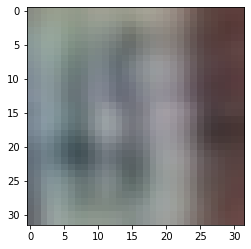

Digit label: [5]


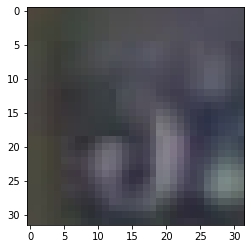

Digit label: [3]


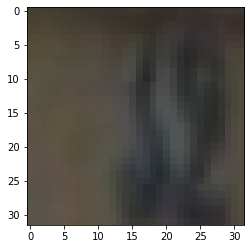

Digit label: [3]


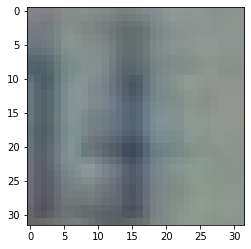

Digit label: [4]


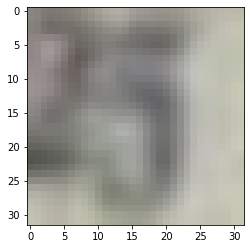

Digit label: [5]


In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from random import randrange

!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

for label in train['y']:
    if label[0] == 10:
        label[0] = 0

for label in test['y']:
    if label[0] == 10:
        label[0] = 0


for i in range(5):
    random_index = randrange(train['X'].shape[3])
    training_sample = train['X'][:, :, :, random_index]
    training_label = train['y'][random_index]

    plt.imshow(training_sample)
    plt.show()
    print(f"Digit label: {training_label}")


Download image dataset, skipping the training data for now

In [3]:
# This code downloads the coco dataset from Amazon S3 in parallel.
!pip install boto3
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess
# Skipping large dataset for now
files = ['val2017.zip', 'annotations_trainval2017.zip'] #, 'train2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

     |████████████████████████████████| 131 kB 13.0 MB/s 
     |████████████████████████████████| 79 kB 4.1 MB/s 
     |████████████████████████████████| 8.0 MB 20.6 MB/s 
     |████████████████████████████████| 138 kB 67.0 MB/s 
  Created wheel for botocore: filename=botocore-1.21.2-py3-none-any.whl size=7712563 sha256=e20b1035688095b2d3b7825a6a7f7cdea391a3c8d1de97d931735d529fb9be9f
  Stored in directory: /root/.cache/pip/wheels/6b/c3/35/758752d521dedd2f0eeeba8b8601cf187968741eafcc53741f
Successfully built botocore
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.6 which is incompatible.
datascience 0.10.6 requires

Showing example from training dataset

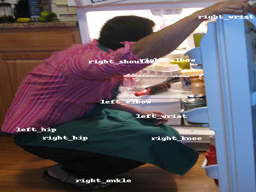

In [12]:
import json
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw


with open("annotations/person_keypoints_val2017.json") as val_keypoints:
    val_keypoint_data = json.load(val_keypoints)

val_keypoint_data['categories']
keypoint_names = val_keypoint_data['categories'][0]['keypoints']

example_image = val_keypoint_data['annotations'][0]
leading_zeros = "0" * (12 - len(str(example_image['image_id'])))

image_file = f"val2017/{leading_zeros}{example_image['image_id']}.jpg"
training_image = plt.imread(image_file)

bbox = example_image['bbox']

im = Image.open(image_file)

keypoints = example_image['keypoints']
drawing = ImageDraw.Draw(im)

for i in range(len(keypoint_names)):
    start = i * 3
    if keypoints[start + 2] == 2:
        # Keypoint is visible
        drawing.text((keypoints[start], keypoints[start + 1]), keypoint_names[i])

im = im.crop((bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]))\
    .resize((256, 192))

im